<a href="https://colab.research.google.com/github/DiyaJ2002/DiyaJain/blob/main/StockpricesPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
!pip install quandl
import quandl
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('TATA.csv')
dates = list(range(0,int(len(data))))
prices = data['Close']
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


In [4]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [5]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [6]:
df = pd.DataFrame(data, columns=['Date','Close'])

df = df.reset_index()
print(df.head())
df.info()

   index        Date   Close
0      0  2018-10-08  215.15
1      1  2018-10-05  209.20
2      2  2018-10-04  218.20
3      3  2018-10-03  227.60
4      4  2018-10-01  230.90
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1235 non-null   int64  
 1   Date    1235 non-null   object 
 2   Close   1235 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 29.1+ KB


In [7]:
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(df, test_size=0.20)
from sklearn.linear_model import LinearRegression
X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']
model = LinearRegression()

In [9]:
model.fit(X_train, y_train)
print('Slope: ', np.ndarray.item(np.squeeze(model.coef_)))
if np.ndarray.item(np.squeeze(model.coef_)) > 0.5:
    print("The stock is in uptrend and you can buy the share")

elif np.ndarray.item(np.squeeze(model.coef_)) < -0.5:
    print('stock is in downtrend you can exit your buy position or short sell ')
else:
    print('sideways market ')

Slope:  -0.08783146195960662
sideways market 


invest as per your analysis
Intercept:  222.32287428958074


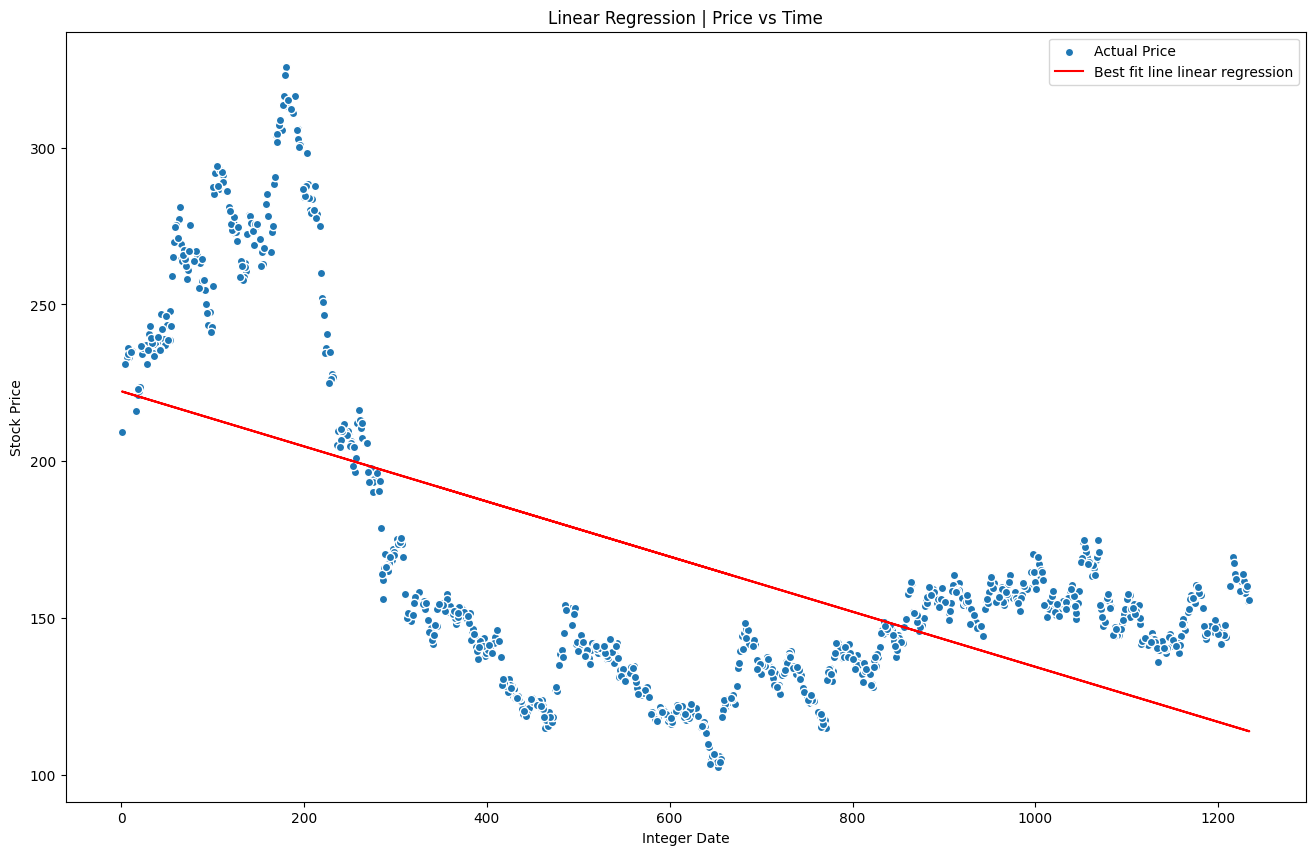

In [10]:
print('invest as per your analysis')
print('Intercept: ', model.intercept_)
plt.figure(1, figsize=(16,10))
plt.title('Linear Regression | Price vs Time')
plt.scatter(X_train, y_train, edgecolor='w', label='Actual Price')
plt.plot(X_train, model.predict(X_train), color='r', label='Best fit line linear regression')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [11]:
X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']
y_pred = model.predict(X_test)
df.shape

(1235, 3)

     index        Date   Close
4        4  2018-10-01  230.90
209    209  2017-12-01  283.55
551    551  2016-07-18  129.95
731    731  2015-10-23  137.80
784    784  2015-08-05  142.15


<ipython-input-12-c7962041b3e2>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')


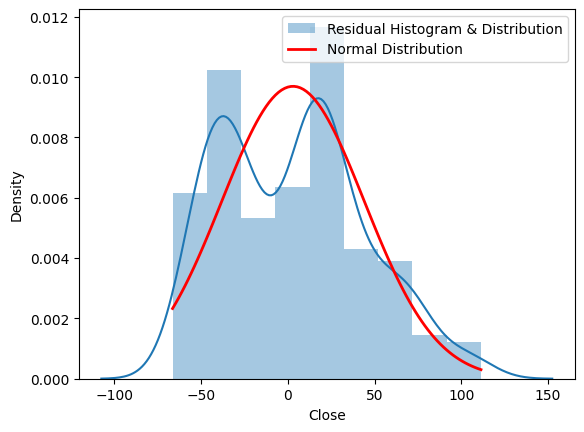

In [12]:
randints = np.random.randint(2550, size=25)

df_sample = df[df.index.isin(randints)]
print(df_sample.head())
from scipy.stats import norm

mu, std = norm.fit(y_test - y_pred)

ax = sns.distplot((y_test - y_pred), label='Residual Histogram & Distribution')

x = np.linspace(min(y_test - y_pred), max(y_test - y_pred), 100)
p = norm.pdf(x, mu, std)
ax.plot(x, p, 'r', lw=2, label='Normal Distribution')

plt.legend()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB
[[222.25 206.85 208.  ]
 [218.6  205.9  217.  ]
 [227.8  216.15 223.5 ]
 ...
 [160.8  155.85 156.  ]
 [158.2  154.15 155.7 ]
 [157.8  155.2  157.  ]]
[215.15 209.2  218.2  ... 160.15 155.55 155.8 ]
[ 0.86774897  0.70835527 -0.57915257]
[263.07774029 131.81985841 159.26638623 133.85508974 120.64380461
 119.93325218 213.74328859 27

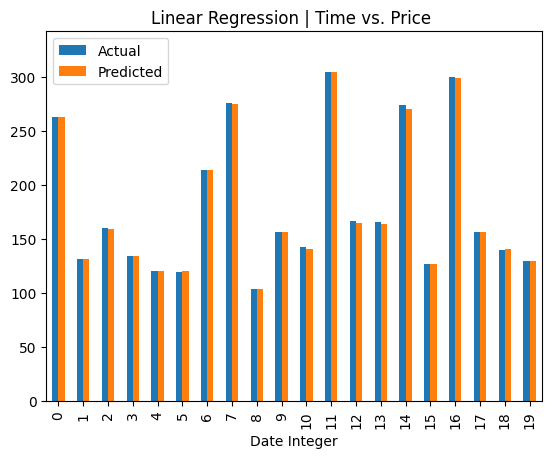

In [13]:
df['Prediction'] = model.predict(np.array(df.index).reshape(-1, 1))
df.head()
data = pd.read_csv('TATA.csv')
data.head(4)
data.info()
data.describe()
X = data[['High','Low','Open']].values
y = data['Close'].values
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
Model = LinearRegression()
Model.fit(X_train, y_train)
print(Model.coef_)
predicted = Model.predict(X_test)
print(predicted)
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
print(data1.head(20))
print(data1.head(-1))
import math
from sklearn import preprocessing
from sklearn import metrics
graph = data1.head(20)
graph.plot(kind='bar')
plt.plot(X_test, y_test, color='green',linewidth=1)
plt.plot(X_test, Model.predict(X_test), color='blue', linewidth=3)
plt.title('Linear Regression | Time vs. Price ')
plt.legend()
plt.xlabel('Date Integer')
plt.show()
